Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [2]:
%matplotlib inline
import random
import numpy as np
import scipy as sc
import scipy.stats as st

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from stats_utils import plotMN, plot_empirical_distribution

## Datos de oleaje y viento y normal 2D

Vamos a examinar datos de viento y oleaje de una boya cerca del puerto de Cádiz.

 - Hm0    : Altura significante Espectral                  (m)
 - DirM   : Direccion Media de PROCEDENCIA del Oleaje      (0=N,90=E)
 - VelV   : Velocidad Media del Viento                     (m/s)
 - DirV   : Direccion Media de PROCEDENCIA del Viento      (0=N,90=E)

También tiene otros datos que vamos a ignorar porque no están completos o no nos interesan.

In [3]:
simar=pd.read_csv('SIMAR_fake.csv')
simar.head()

AA  MM  DD  HH  Hm0  Tm02    Tp   DirM  Hm0_V  DirM_V  Hm0_F1  Tm02_F1  \
0  2006  12  13  15  0.3  10.9  12.1  272.0    NaN     NaN     NaN      NaN   
1  2006  12  13  18  0.3  10.3  12.0  267.0    NaN     NaN     NaN      NaN   
2  2006  12  13  21  0.3  10.3  11.8  268.0    NaN     NaN     NaN      NaN   
3  2006  12  14   0  0.3  10.7  11.6  271.0    NaN     NaN     NaN      NaN   
4  2006  12  14   3  0.3  10.6  11.4  269.0    NaN     NaN     NaN      NaN   

   DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  VelV  DirV  
0      NaN     NaN      NaN      NaN   NaN   NaN  
1      NaN     NaN      NaN      NaN   NaN   NaN  
2      NaN     NaN      NaN      NaN   NaN   NaN  
3      NaN     NaN      NaN      NaN   NaN   NaN  
4      NaN     NaN      NaN      NaN   NaN   NaN

In [4]:
simar.tail()

AA  MM  DD  HH  Hm0  Tm02   Tp   DirM  Hm0_V  DirM_V  Hm0_F1  \
100191  2019   1  30  20  1.0   4.6  4.6  200.0    NaN     NaN     NaN   
100192  2019   1  30  21  1.0   4.6  4.6  201.0    NaN     NaN     NaN   
100193  2019   1  30  22  1.0   4.5  4.6  200.0    NaN     NaN     NaN   
100194  2019   1  30  23  0.9   4.5  4.4  200.0    NaN     NaN     NaN   
100195  2019   1  31   0  0.9   4.4  4.3  199.0    NaN     NaN     NaN   

        Tm02_F1  DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  VelV  DirV  
100191      NaN      NaN     NaN      NaN      NaN  11.1  92.0  
100192      NaN      NaN     NaN      NaN      NaN  11.1  85.0  
100193      NaN      NaN     NaN      NaN      NaN   8.9  80.0  
100194      NaN      NaN     NaN      NaN      NaN   9.5  99.0  
100195      NaN      NaN     NaN      NaN      NaN  12.0  93.0

In [5]:
simar.describe()

AA             MM             DD             HH  \
count  100196.000000  100196.000000  100196.000000  100196.000000   
mean     2012.602908       6.546669      15.736287      11.482375   
std         3.515889       3.489739       8.798571       6.922825   
min      2006.000000       1.000000       1.000000       0.000000   
25%      2010.000000       4.000000       8.000000       6.000000   
50%      2012.000000       7.000000      16.000000      12.000000   
75%      2016.000000      10.000000      23.000000      18.000000   
max      2019.000000      12.000000      31.000000      23.000000   

                 Hm0           Tm02             Tp           DirM  Hm0_V  \
count  100196.000000  100196.000000  100184.000000  100196.000000    0.0   
mean        0.746351       6.160956       6.730709     267.390355    NaN   
std         0.509752       2.012358       3.277458      33.017271    NaN   
min         0.000000       0.400000       2.100000       0.000000    NaN   
25%         0.400000       4.600000       4.300000     251.000000    NaN   
50%         0.600000       5.600000       5.200000     279.000000    NaN   
75%         0.900000       7.400000       9.000000     291.000000    NaN   
max         5.900000      16.800000      20.900000     359.000000    NaN   

       DirM_V  Hm0_F1  Tm02_F1  DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  \
count     0.0     0.0      0.0      0.0     0.0      0.0      0.0   
mean      NaN     NaN      NaN      NaN     NaN      NaN      NaN   
std       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
min       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
25%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
50%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
75%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
max       NaN     NaN      NaN      NaN     NaN      NaN      NaN   

               VelV          DirV  
count  99977.000000  99977.000000  
mean       5.258193    198.900567  
std        2.765232    101.159532  
min        0.000000      0.000000  
25%        3.200000    110.000000  
50%        4.800000    221.000000  
75%        6.900000    288.000000  
max       20.600000    360.000000

### Histogramas de altura de ola y velocidad del viento

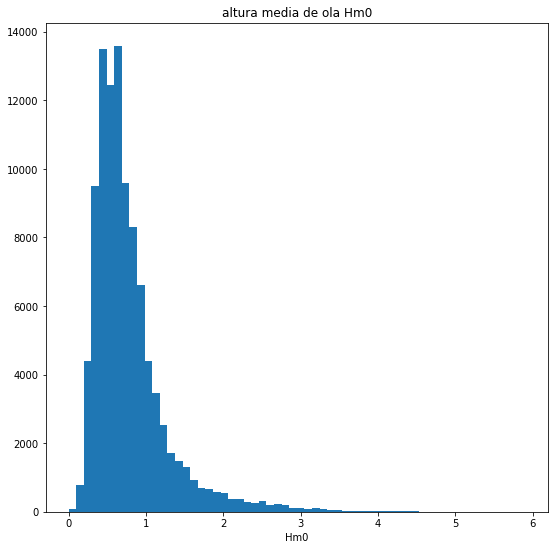

In [11]:
plt.figure(figsize=(9,9))
plt.hist(simar['Hm0'], bins=60)
plt.xlabel('Hm0')
plt.title('altura media de ola Hm0')
plt.show()

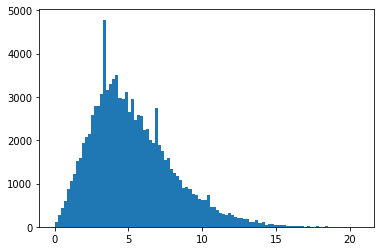

In [9]:
#Tenemos que quitar primero los datos NA (Not Available)
notnas = simar['VelV'].notna()
velV_sin_na = simar['VelV'][notnas]
plt.hist(velV_sin_na, bins=100);

No parece una distribución normal:
 
 - no es simétrica
 - sólo toma valores positivos (aunque)

### Distribución de la velocidad del viento

Dibujamos el histograma de velocidad del viento junto con la función de densidad de la Normal con la misma media y desviación típica.

Recordamos que la normal que mejor ajusta a los datos *en el sentido de "máxima verosimilitud"* es la $\operatorname{Normal}(\mu, \sigma^2)$ que tiene su parámetro $\mu$ igual a la *media muestral*:
$$
\bar{x} = \frac{1}{n}\sum_{j=1}^n x_j
$$
y su parámetro $\sigma^2$ igual a la *varianza muestral*:
$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^n (x_j - \bar{x})^2
$$


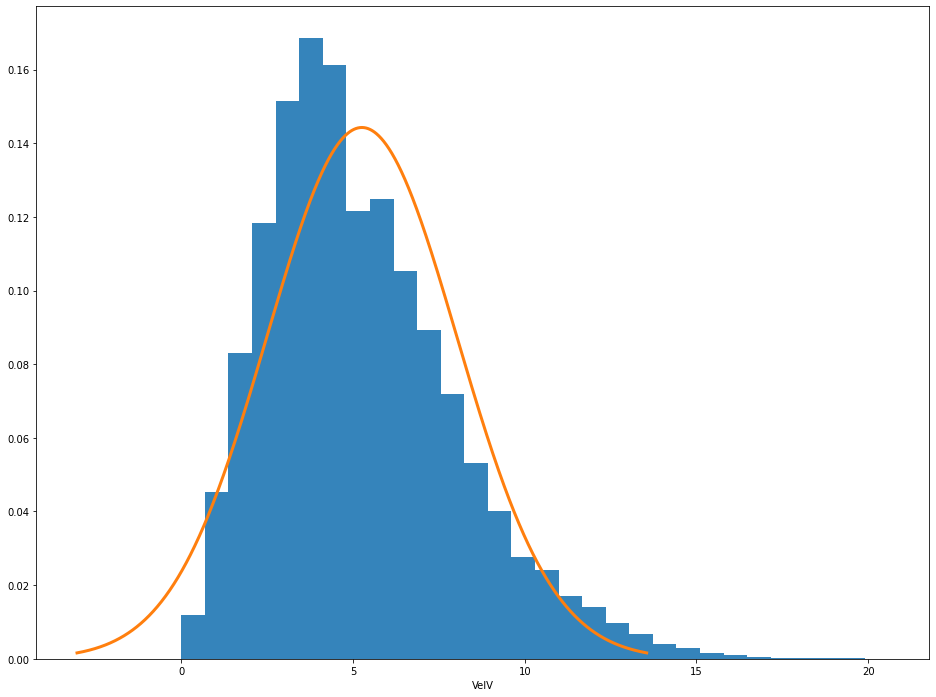

In [7]:
VelV = simar['VelV'][simar['VelV'].notna()]
meanV, stdV = VelV.mean(), VelV.std()

plt.figure(figsize=(16,12))

plt.hist(VelV, bins=30, density=1,alpha=0.9)

xs = np.arange(meanV-3*stdV,meanV+3*stdV,0.01)
N = st.norm(loc=meanV, scale=stdV)
ys = N.pdf(xs)
lines = plt.plot(xs,ys, lw=3)
plt.xlabel('VelV')
plt.show()

La [distribución de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_distribution) ajusta mucho mejor, si escogemos el parámetro adecuadamente. Para la distribución de Rayleigh, el valor de máxima verosimilitud para el parámetro de escala es:

$${\displaystyle {\widehat {\sigma }}\approx {\sqrt {{\frac {1}{2N}}\sum _{i=1}^{N}x_{i}^{2}}}}$$

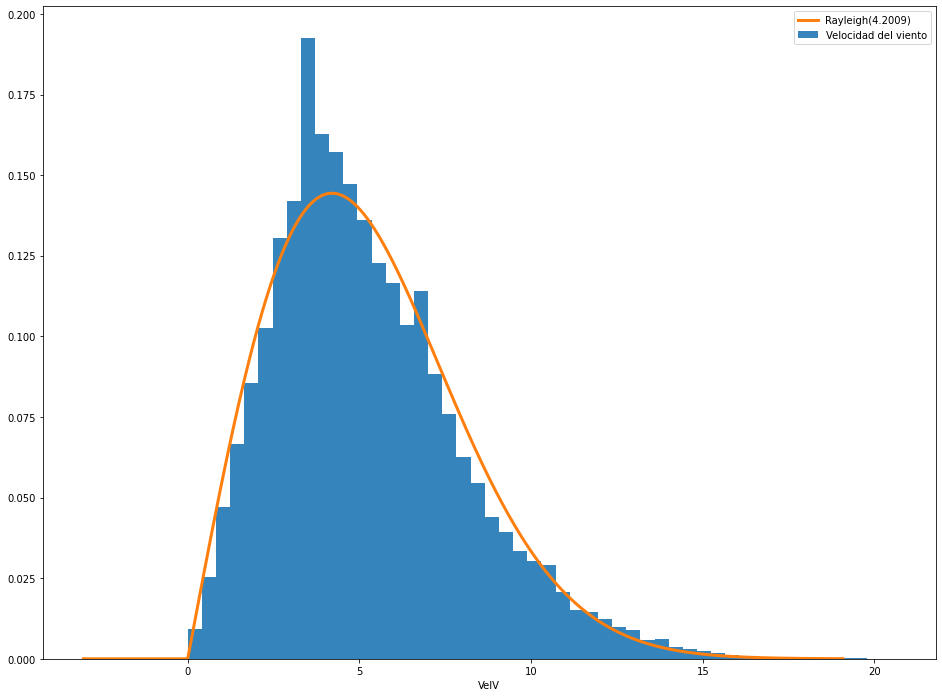

In [8]:
plt.figure(figsize=(16,12))

plt.hist(VelV, bins=50, density=1,alpha=0.9, label='Velocidad del viento')

scale_data = np.sqrt((VelV**2).sum()/(2*len(VelV)))
R = st.rayleigh(scale=scale_data)

xs = np.arange(meanV-3*stdV,meanV+5*stdV,0.01)
ys = R.pdf(xs)
lines = plt.plot(xs,ys, lw=3, label='Rayleigh(%.4f)'%scale_data)
plt.legend()
plt.xlabel('VelV')
plt.show()

El resultado es igual de revelador usando la función de distribución empírica

Comparamos con la normal

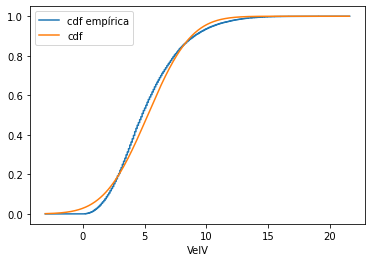

In [9]:
data = simar['VelV'][simar['VelV'].notna()]
mean, std = data.mean(), data.std()
N = st.norm(loc=mean, scale=std)
plot_empirical_distribution(data,N)
plt.xlabel('VelV')
plt.show()

Comparamos con la distribución de Rayleigh

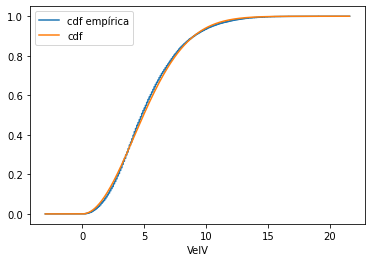

In [10]:
data = simar['VelV'][simar['VelV'].notna()]
mean, std = data.mean(), data.std()
R = st.rayleigh(scale=scale_data)
plot_empirical_distribution(data,R)
plt.xlabel('VelV')
plt.show()

### Maximum likelihood con ``st.rayleigh.fit(data, floc=0)``

En lugar de usar las fórmulas de la tabla (o de la wikipedia, o de cualquier libro de texto), podemos encontrar los valores de los parámetros que maximizan la verosimilitud *numéricamente*, usando la sintaxis:

```python
loc0, scale0 = st.rayleigh.fit(VelV, floc=0)
```

Donde:
 - ``loc`` y ``scale`` son los dos parámetros que ``scipy.stats`` reconoce para ``scipy.stats.rayleigh``
 - ``floc=0`` indica que queremos fijar ``loc`` a ``0``, porque no queremos que la desplace. _(19-04-22: es necesario poner un valor negativo para floc, por pequeño que sea, porque hay datos donde la velocidad del viento es exactamente 0, y en versiones recientes de `scipy.stats` ésto supone un problema para `st.rayleigh.fit` porque 0 está en el límite del dominio)._
 - ``VelV`` son los datos

In [11]:
#Obtenemos un valor muy similar al anterior
st.rayleigh.fit(VelV, floc=-1e-8)

(-1e-08, 4.200894414379206)

### Distribución de la altura del oleaje

In [12]:
HM = simar['Hm0'][simar['Hm0'].notna()]
meanH, stdH = HM.mean(), HM.std()

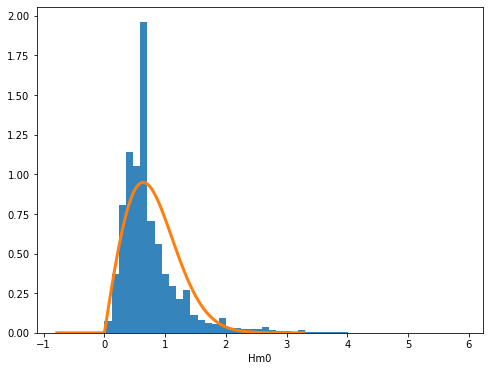

In [13]:
plt.figure(figsize=(8,6))

plt.hist(HM, bins=50, density=1,alpha=0.9)

xs = np.arange(meanH-3*stdH,meanH+5*stdH,0.01)
loc0, scale0 = st.rayleigh.fit(HM, floc=-1e-8)
R = st.rayleigh(scale=scale0)
ys = R.pdf(xs)
lines = plt.plot(xs,ys, lw=3)

plt.xlabel('Hm0')
plt.show()

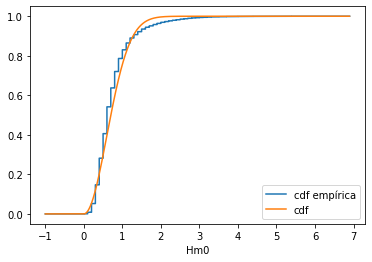

In [14]:
R = st.rayleigh(scale=meanH/np.sqrt(np.pi/2))
plot_empirical_distribution(HM,R)

plt.xlabel('Hm0')
plt.show()

La distribución de Rayleigh ajusta mejor que una normal, pero no ajusta tan bien como lo hacía para la velocidad del viento. Se suele modelizar como una [distribución de Weibull](https://en.wikipedia.org/wiki/Weibull_distribution), que es algo más difícil de ajustar:

  - En la wikipedia puedes leer que no se conoce una expresión cerrada para el estimador de máxima verosimilitud. 
  - El método ``st.weibull_min.fit(HM, floc=0)`` devuelve unos valores muy malos de los parámetros, porque el método ``fit`` necesita un punto de partida decente. Cualquier número ``c_ini`` mayor que uno es un buen punto de partida para ``st.weibull_min.fit(HM, c_ini, floc=0)``

In [15]:
c_ini = 2
c0, loc0, scale0 = st.weibull_min.fit(HM, c_ini, floc=0)
print(c0, loc0, scale0)

1.6327028875202405 0 0.8414213874326455


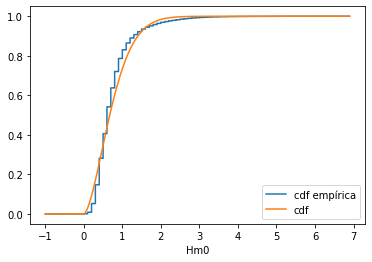

In [16]:
W = st.weibull_min(c=c0, loc=loc0, scale=scale0)
plot_empirical_distribution(HM,W)

plt.xlabel('Hm0')
plt.show()

En este caso concreto tampoco ajusta mucho mejor que una Rayleigh :-/

## Relaciones entre variables

Una correlación interesante: ¿a mayor velocidad del viento mayor altura del oleaje?

In [17]:
simar['VelV'].mean(), simar['Hm0'].mean()

(5.25819338447843, 0.7463511517425845)

<AxesSubplot:xlabel='VelV', ylabel='Hm0'>

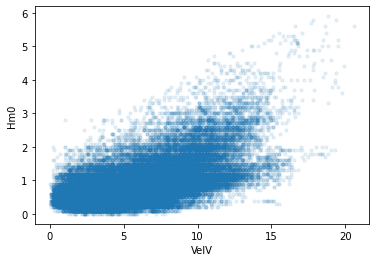

In [18]:
simar.plot.scatter(y = 'Hm0', x = 'VelV', s=10, alpha=0.1)

Observamos correlación positiva entre las variables.

In [19]:
simar[['Hm0','VelV']].corr()

Hm0      VelV
Hm0   1.000000  0.615358
VelV  0.615358  1.000000

Intentamos ajustar el vector **(Altura significativa, velocidad del viento)** por una normal multivariante...

La normal multivariante que mejor ajusta a los datos es la que tiene parámetro 
$\mathbf{\mu}$ igual a la *media muestral* $\bar{\mathbf{x}}=\frac{1}{n}\sum_{j=1}^n \mathbf{x}_j$ y parámetro $\Sigma$ igual a la matriz de covarianzas de la muestra $\frac{1}{n}\sum_{j=1}^n (\mathbf{x}_j-\bar{\mathbf{x}})^t\cdot (\mathbf{x}_j-\bar{\mathbf{x}})$.

El conjunto de puntos **(Altura significativa, velocidad del viento)** no parece sacado de una normal multivariante.

Hm0     0.746351
VelV    5.258193
dtype: float64
           Hm0      VelV
Hm0   0.259847  0.867027
VelV  0.867027  7.646506


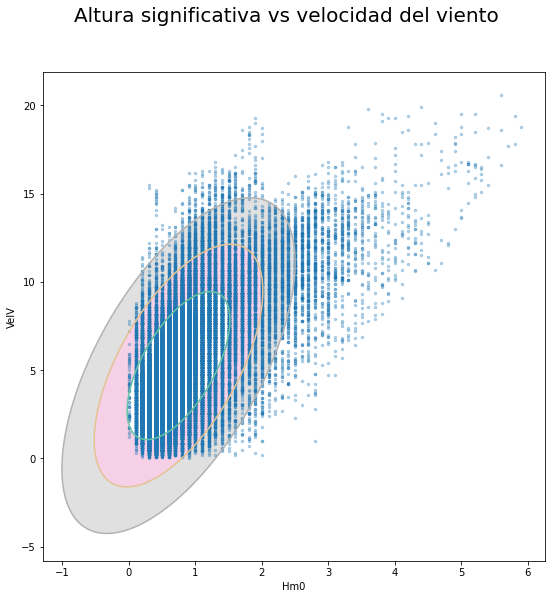

In [20]:
data = simar[['Hm0','VelV']]
means = data.mean()
Sigma = data.cov()
print(means)
print(Sigma)
MN = st.multivariate_normal(mean=means, cov=Sigma)
fig = plt.figure(figsize=(9,9))
fig.suptitle('Altura significativa vs velocidad del viento', fontsize=20)
plotMN(MN, npoints=200)
plt.scatter(data[data.columns[0]], data[data.columns[1]], s=6, alpha=0.3)
plt.xlabel('Hm0')
plt.ylabel('VelV')
plt.show()

## Descomponemos el viento en componentes

Según la wikipedia:

> One example where the Rayleigh distribution naturally arises is when wind velocity is analyzed into its orthogonal 2-dimensional vector components. Assuming that each component is uncorrelated, normally distributed with equal variance, and zero mean, then the overall wind speed (vector magnitude) will be characterized by a Rayleigh distribution.

Descomponemos el viento en sus componentes NS y EW, y vemos que la distribución se parece razonablemente a una normal multivariante, cuyos parámetros hemos encontrado igual que antes.

VEW   -0.458743
VNS    0.006280
dtype: float64
           VEW        VNS
VEW  22.397501  -3.780273
VNS  -3.780273  12.687393


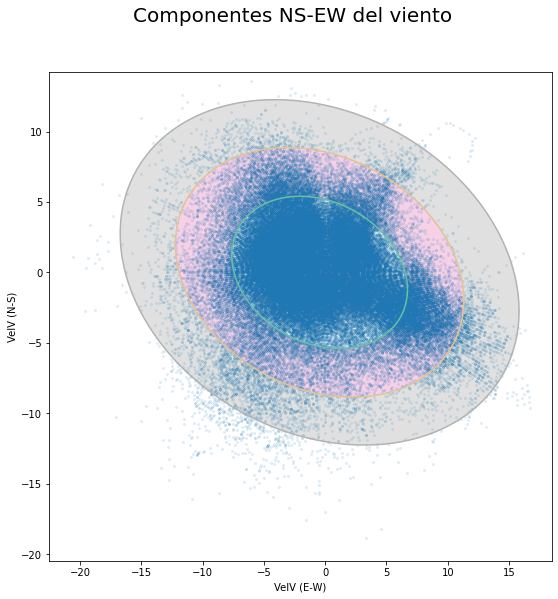

In [21]:
VNS_EW = pd.DataFrame({
        'VEW': np.sin(simar['DirV']*np.pi/180)*simar['VelV'],
        'VNS': np.cos(simar['DirV']*np.pi/180)*simar['VelV'],
    })
data = VNS_EW[['VEW', 'VNS']]
means = data.mean()
Sigma = data.cov()
print(means)
print(Sigma)
MN = st.multivariate_normal(mean=means, cov=Sigma)
fig = plt.figure(figsize=(9,9))
fig.suptitle('Componentes NS-EW del viento', fontsize=20)
plotMN(MN, npoints=200)
plt.scatter(data[data.columns[0]], data[data.columns[1]], s=4, alpha=0.1)

plt.xlabel('VelV (E-W)')
plt.ylabel('VelV (N-S)')
plt.show()

Sin embargo, para los datos de oleaje, para los que los datos de altura significativa de la ola no sigue una distribución de Rayleigh, la normal multivariante no es una buena aproximación para las componentes direccionales.

El mecanismo que genera este fenómeno es otro...

HNS   -0.020276
HEW   -0.649592
dtype: float64
          HNS       HEW
HNS  0.125880 -0.011542
HEW -0.011542  0.268629


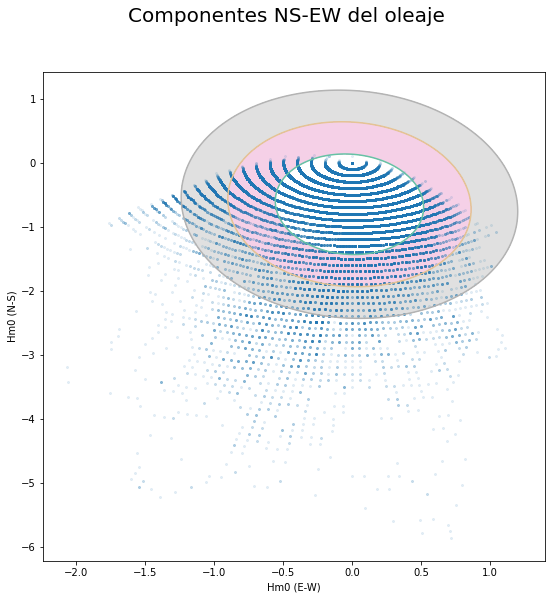

In [22]:
HNS_EW = pd.DataFrame({
        'HNS': np.cos(simar['DirM']*np.pi/180)*simar['Hm0'],
        'HEW': np.sin(simar['DirM']*np.pi/180)*simar['Hm0'],
    })
data = HNS_EW
means = data.mean()
Sigma = data.cov()
print(means)
print(Sigma)
MN = st.multivariate_normal(mean=means, cov=Sigma)
fig = plt.figure(figsize=(9,9))
fig.suptitle('Componentes NS-EW del oleaje', fontsize=20)
plotMN(MN, npoints=200)
plt.scatter(data[data.columns[0]], data[data.columns[1]], s=4, alpha=0.1)

plt.xlabel('Hm0 (E-W)')
plt.ylabel('Hm0 (N-S)')
plt.show()

Estudiamos las correlaciones entre las componentes del viento y el oleaje. Aunque la normal multivariante no es un buen modelo para el oleaje, hay correlaciones importantes entre las componentes NS del viento y el oleaje, y no las hay entre las componentes NS de una y EW de la otra.

In [23]:
data = pd.DataFrame({
        'HNS': np.cos(simar['DirM']*np.pi/180)*simar['Hm0'],
        'VNS': np.cos(simar['DirV']*np.pi/180)*simar['VelV'],
        'HEW': np.sin(simar['DirM']*np.pi/180)*simar['Hm0'],
        'VEW': np.sin(simar['DirV']*np.pi/180)*simar['VelV'],
    })
print(data.corr())

          HNS       VNS       HEW       VEW
HNS  1.000000  0.650781 -0.062769 -0.661396
VNS  0.650781  1.000000  0.145394 -0.224252
HEW -0.062769  0.145394  1.000000  0.458963
VEW -0.661396 -0.224252  0.458963  1.000000


Es una pena que los datos de esta boya no traigan el oleaje desglosado en "mar de viento" y "mar de fondo". En fin, podríamos seguir afinando, pero lo vamos a dejar aquí...

### Ejercicio

Ajusta una normal multivariante a los datos:

 - Tm02   : Periodo Medio Espectral Momentos 0 y 2         (s)
 - Tp     : Periodo de pico espectral                      (s)

Preguntas

 - ¿Hay correlación, positiva o negativa, entre ambas variables?
 - ¿Es la normal multivariante un buen modelo?

In [24]:
data = simar[['Tp', 'Tm02']]
data.mean()

Tp      6.730709
Tm02    6.160956
dtype: float64

### Ejercicio

Ajusta una normal multivariante a los datos:

 - log(Tm02)   : **logaritmo** del Periodo Medio Espectral Momentos 0 y 2         (s)
 - log(Tp)     : **logaritmo** del Periodo de pico espectral                      (s)

Preguntas

 - ¿Hay correlación, positiva o negativa, entre ambas variables?
 - ¿Es la normal multivariante un buen modelo?

In [25]:
logTpTm = pd.DataFrame({
        'logTp': np.log(simar['Tp']),
        'logTm': np.log(simar['Tm02']),
    })
logTpTm.mean()

logTp    1.801397
logTm    1.769036
dtype: float64